In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Copy of devnagari digit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
# generators -> divide all the data to batches
# each time batch is loaded on RAM and remove after job done and
# process continues until all batches done
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)



Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.


In [4]:
#normalize -> for value (0 to 255) to (0 to 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [5]:
#prediction
import cv2

test_image1_0 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Train/digit_0/103265.png')
test_image2_9 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_9/10407.png')
test_image2_2 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_2/12535.png')





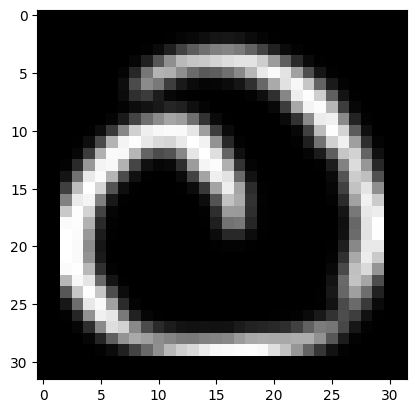

In [6]:
import matplotlib.pyplot as plt
plt.imshow(test_image1_0)

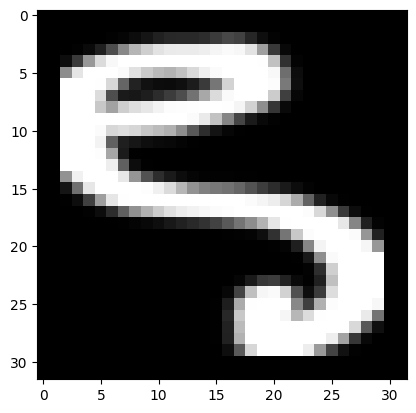

In [7]:
plt.imshow(test_image2_9)

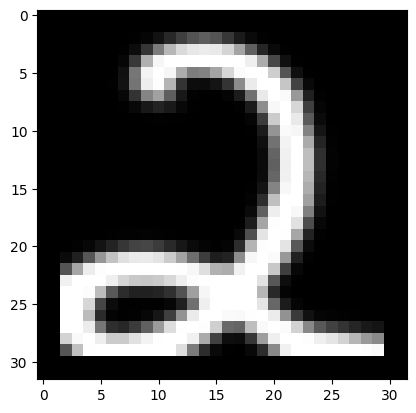

In [8]:
plt.imshow(test_image2_2)

In [9]:
test_image2_9.shape

(32, 32, 3)

In [10]:
#decreasing image size
test_image1 = cv2.resize(test_image2_9,(256,256)) # Resized to (256, 256)
test_image2 = cv2.resize(test_image1_0,(256,256)) # Resized to (256, 256)
test_image3 = cv2.resize(test_image2_2,(256,256)) # Resized to (256, 256)



In [11]:
#reshaping image shape
test_input1 = test_image1.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input2 = test_image2.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input3 = test_image3.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)

In [12]:
#using ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [13]:
# Normalize the pixel values to range [0,1]
normalization_layer = keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))


In [14]:

ann_model = Sequential()
ann_model.add(Flatten(input_shape=(256, 256, 3)))
ann_model.add(Dense(64, activation='sigmoid'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128, activation='sigmoid'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(256, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile the model
ann_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
# Summary of the model
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      12,582,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,626,890 (48.17 MB)

 Trainable params: 12,626,890 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model using the data generators
history = ann_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.1558 - loss: 2.2535 - val_accuracy: 0.7057 - val_loss: 1.1615
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.6877 - loss: 0.9968 - val_accuracy: 0.8360 - val_loss: 0.4918
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.8061 - loss: 0.5497 - val_accuracy: 0.8793 - val_loss: 0.3560
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.8469 - loss: 0.4220 - val_accuracy: 0.9207 - val_loss: 0.2727
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8873 - loss: 0.3343 - val_accuracy: 0.9370 - val_loss: 0.2217
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9032 - loss: 0.2888 - val_accuracy: 0.9443 - val_loss: 0.1850
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9193 - loss: 0.2491 - val_accuracy: 0.9543 - val_loss: 0.1629
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.9320 - loss: 0

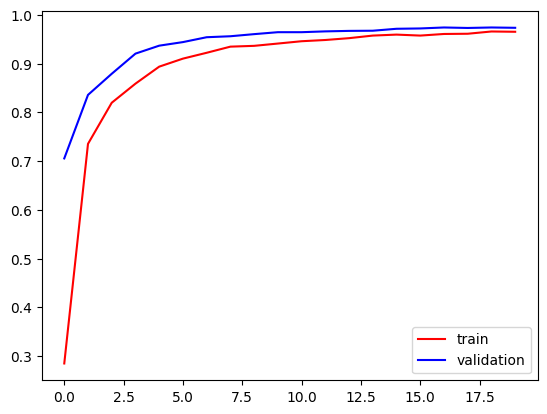

In [18]:
#accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

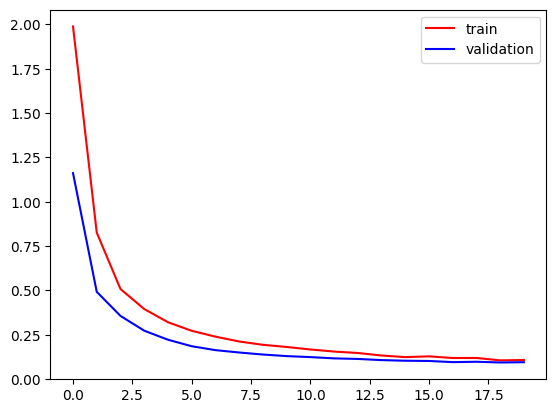

In [19]:
#losss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [20]:
test_input3.shape

(1, 256, 256, 3)

In [43]:
import numpy as np
pred = ann_model.predict(test_input3) #2
pred_digit = np.argmax(pred)
print(f"predicted output image value is {pred_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted output image value is 3


In [44]:
import numpy as np
# Predict on test data
predictions = ann_model.predict(validation_ds)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


In [45]:
print("Prediction : ",predictions[0])
print("Predicted label : ",predicted_labels[0])
print("Prdection shape", predictions[0].shape)


Prediction :  [1.0722525e-10 1.3113969e-06 2.6593741e-03 9.9181455e-01 4.4439903e-06
 5.4340917e-03 8.0874997e-05 4.8852953e-06 8.0557534e-09 3.7257973e-07]
Predicted label :  3
Prdection shape (10,)


In [46]:
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")


Predicted label for first image: 3


In [47]:
# Get the shape of the first image in the validation dataset
for image, label in validation_ds.take(2):
  print("Image shape:", image.shape)
  print("Label shape:", label.shape)


Image shape: (128, 256, 256, 3)
Label shape: (128,)
Image shape: (128, 256, 256, 3)
Label shape: (128,)


In [48]:
# print(f"True label for first image: {np.argmax(validation_ds[0])}")

In [50]:
ann_model.save("ann_model.h5")

#Loading Saved Model

In [51]:
loaded_model = tf.keras.models.load_model("ann_model.h5")

In [52]:
predict1 = loaded_model.predict(test_input3) #image is 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


In [53]:
predicted_digit = np.argmax(predict1)
print("Predicted digit:", predicted_digit)

Predicted digit: 3
